# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: July 15 2022
* Student Name: Gargee Jagtap
* Student Net ID: wra2jv
* This URL: https://github.com/gjagtap2/FinalProjectDS5100/blob/main/FinalProjectSubmissionTemplate.ipynb
* GitHub Repo URL: https://github.com/gjagtap2/FinalProjectDS5100

# The Monte Carlo Module

In [1]:
import enchant
import numpy as np
import pandas as pd
from turtle import color
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
class Die():

    '''
    PURPOSE: create a die object by assigning faces and weights
    '''
    
    
    def __init__(self, faces):

        '''
        PURPOSE: initialize arguments of faces, weights, and private dataframe

        INPUTS
        faces:  an array of faces with dtype strings or numbers

        initializes weights to 1.0 for each face
        saves both faces and weights into a private dataframe that is shared by the other methods
        '''

        self.faces = faces
        self.weights = [1.0 for i in faces]
        self._df = pd.DataFrame({
            'faces': self.faces,
            'weights': self.weights
        })



    def changeWeight(self, face, new_weight):

        '''
        PURPOSE: a method to change the weight of a single face

        INPUTS
        face (dtype=str or int) :        the face value to be changed                    
        new_weight  (dtype=float or can be converted into a float):  the new weight to be assigned to that face value     [float] or [int]

        checks to see if the face passed is valid (in the array of faces)
        checks to see if weight dtype valid (is a float, or can be turned into a float)
        '''

        if (face not in self.faces):
            print("Face value not found. Please enter a valid face value")
        if (type(float(new_weight))!=float):
            print("Please provide weight as a float")
        else:
            self.weights[self.faces.index(face)]=float(new_weight)
            self._df.loc[:,'weights'][self.faces.index(face)]=float(new_weight)



    def rollDie(self, nrolls=1):

        '''
        PURPOSE: a method to roll the die one or more times, random sample of faces according to weights

        INPUTS
        nrolls (dtype=int):  how many times the die is to be rolled 
        
        OUTPUTS
        list of outcomes generated by rolling the die nrolls times
        '''

        outcomes = self._df.faces.sample(n = nrolls, replace=True, weights=self._df.weights)
        return list(outcomes)


    
    def showCurrent(self):

        '''
        PURPOSE: a method to show the user the die's current set of faces and weights

        OUTPUTS
        the dataframe created in the initializer with the updated set of weights (if changed) and the associated faces
        '''
        return self._df

In [3]:
class Game():

    '''
    PURPOSE: play a game by rolling one or more dice of the same kind a given number of times the class keeps the result of its most recent play
    '''

    def __init__(self,dieObjects):

        '''
        PURPOSE: initialize arguments of die objects

        INPUTS
        dieObjects (dtype=list): list of already instantiated one or more similarly defined dice objects
        * each die in a given game has the same number of sides & associated faces, but each die object may have different weights
        
        '''
        self.dieObjects = dieObjects

    
    def play(self, num_rolls):

        '''
        PURPOSE: a method to play the game by rolling the dice a given number of times

        INPUTS
        num_rolls  (dtype=int):  number of times the dice should be rolled

        saves the result of the game to a private dataframe
        
        '''
        
        rollNumber = [i for i in range(1,num_rolls+1)]
        self._dfgame = pd.DataFrame({'rollNumber':rollNumber,}).set_index('rollNumber')
        for i in range(len(self.dieObjects)):
            self._dfgame[i] = (self.dieObjects[i].rollDie(num_rolls))


    def show(self, form = 'wide'):

        '''
        PURPOSE: a method to show the user the results of the most recent play

        INPUTS
        form:  a parameter to return the dataframe in "wide" (default) or "narrow" form  [string]

        OUTPUTS
        _dfgame:  dataframe containing results of game in specified form
        '''

        if form=='wide':
            return self._dfgame
        if form=='narrow':
            self._dfgame = self._dfgame.melt(
                value_vars = [i for i in range(len(self.dieObjects))],
                var_name = 'dieNumber', value_name = 'faceRolled',
                ignore_index=False).reset_index().set_index(['dieNumber','rollNumber'])
            return self._dfgame
        else:
            print("Invalid request, please enter 'narrow' or 'wide'.")

In [4]:
class Analyzer():

    '''
    PURPOSE: takes the result of a single game and computes various descriptive statistical properties about it
    * the properties results are available as attributes of an Analyzer object
    '''

    def __init__(self, gameObject):

        '''
        PURPOSE: initialize arguments of a game object, infers data type of the die faces used

        INPUTS
        gameObject: game object

        saves dataframe of game object to resultsDF
        '''
        self.resultsDF = gameObject.show()

    def jackpot(self):

        '''
        PURPOSE: a method to compute how many times the game resulted in all faces being identical

        stores the results as a dataframe of jackpot results in a public attribute with roll number as a named index

        OUTPUTS:
        an integer for the number a times a jackpot was achieved 

        '''
        self.jackpotResults = self.resultsDF[self.resultsDF.nunique(axis=1).eq(1)]
        return len(self.jackpotResults)


    def combo(self):

        '''
        PURPOSE: a method to compute the distinct combinations of faces rolled along with their counts

        stores the results as a multi-columned index dataframe in a public attribute of sorted combinations
        '''
        #self.comboDF = (self.resultsDF.value_counts()).to_frame(name='frequencies')
        self.comboDF = self.resultsDF.apply(lambda x: pd.Series(sorted(x)), 1)\
            .value_counts().to_frame('frequencies')


    def facecountsperroll(self):

        '''
        PURPOSE: a method to compute how many times a given face is rolled in each event

        stores the results as a dataframe in a public attribute with roll number as the index and face values as columns
        '''
        self.facecountsDF = self.resultsDF.apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)

# Test Module

In [ ]:
import unittest
import enchant
import numpy as np
import pandas as pd
from MonteCarloSimulator.montecarlo import *
from turtle import color
from sympy import GreaterThan
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None


class DieTestSuite(unittest.TestCase):

    def test_1_DIE_changeWeight(self):

        '''
        The die object of 6 faces has been created below. The weight for face 6 has been changed from 1.0 to 5.0
        This method checks to see that the changeWeight method has run correctly, and the dataframe is updated with the new weight.
        Returns "ok" if the method returns a dataframe with the correct weights.
        '''

        dieObject.changeWeight(6,5)
        faces = [1,2,3,4,5,6]
        weights = [1.0, 1.0, 1.0, 1.0, 1.0, 5.0]
        expected = pd.DataFrame({
            'faces': faces,
            'weights': weights
        })
        pd.testing.assert_frame_equal(dieObject.showCurrent(), expected)


    def test_2_DIE_rollDie(self):

        '''
        The die object of 6 faces has been created below. The die has been rolled 20 times.
        This test checks that the rollDie method has run correctly, by checking the length of the list of faces.
        Returns "ok" if the object has the correct length (20).
        '''
        
        length = len(dieObject.rollDie(20))
        expected=20
        self.assertEqual(length, expected)


    def test_3_DIE_showCurrent_die(self):

        '''
        The die object of 6 faces has been created below. 
        This test checks that the showCurrent method has run correctly, by checking the dimensions of the dataframe,
         which should have each row representing each face, and the column represents the weight for each face.
        Returns "ok" if the dataframe has the correct dimensions (6x2).
        '''

        df = dieObject.showCurrent()
        self.assertEqual(list(df.shape),[6,2])



class GameTestSuite(unittest.TestCase):

    def test_4_GAME_play(self):

        '''
        The game object has been created below containing two 6 sided die with all weights of 1.0
        This test checks that the play method has run correctly, by checking the dimensions of the dataframe,
         which should have the number of rows equal to the number of rolls, and the number of columns equal to the number of die.
        Returns "ok" if the dataframe has dimensions the correct dimensions (1000x2).
        '''

        gameObject.play(1000)
        self.assertEqual(list(gameObject._dfgame.shape),[1000,2])

    def test_5_GAME_show(self):

        '''
        The game object has been created below containing two 6 sided die with all weights of 1.0
        This test checks that the show method has run correctly, by checking the dimensions of the dataframe,
         which should have the number of rows equal to the number of rolls, and the number of columns equal to the number of die.
        Returns "ok" if the dataframe has the correct dimensions (1000x2).
        '''

        self.assertEqual(list(gameObject.show().shape), [1000,2])




class AnalyzerTestSuite(unittest.TestCase):

    def test_6_ANALYZER_jackpot(self):

        '''
        The analyzer object has been created by inputting the game object as the input parameter.
        This test checks that the jackpot method has run correctly, by counting the number of jackpots generated in 1000 rolls.
        Returns "ok" if the number of jackpot counts is greater than 0.
        '''

        gameObject.play(1000)
        analyzerObject = Analyzer(gameObject)
        self.assertGreater(analyzerObject.jackpot(),0)


    def test_7_ANALYZER_combo(self):

        '''
        The analyzer object has been created by inputting the game object as the input parameter.
        This test checks that the combo method has run correctly, by summing the frequency column in the combo dataframe.
        Returns "ok" if the sum is equal to the total number of rolls.
        '''

        gameObject.play(1000)
        analyzerObject = Analyzer(gameObject)
        analyzerObject.combo()
        self.assertEqual(analyzerObject.comboDF['frequencies'].sum(),1000)

    def test_8_ANALYZER_facecounts(self):

        '''
        The analyzer object has been created by inputting the game object as the input parameter.
        This test checks that the combo method has run correctly,
         by ensuring that the number of rolls in the returned dataframe is equal to the number of times the die were rolled in the game.
        Returns "ok" if the nuymber of rolls in the facecounts dataframe is equal to 1000.
        '''

        gameObject.play(1000)
        analyzerObject = Analyzer(gameObject)
        analyzerObject.facecountsperroll()
        self.assertEqual(len(analyzerObject.facecountsDF), 1000)



if __name__ == '__main__':
    dieObject = Die([1,2,3,4,5,6])
    gameObject = Game([dieObject, dieObject])
    unittest.main(verbosity=3)

# Test Results

In [ ]:
test_6_ANALYZER_jackpot (__main__.AnalyzerTestSuite) ... ok
test_7_ANALYZER_combo (__main__.AnalyzerTestSuite) ... ok
test_8_ANALYZER_facecounts (__main__.AnalyzerTestSuite) ... ok
test_1_DIE_changeWeight (__main__.DieTestSuite) ... ok
test_2_DIE_rollDie (__main__.DieTestSuite) ... ok
test_3_DIE_showCurrent_die (__main__.DieTestSuite) ... ok
test_4_GAME_play (__main__.GameTestSuite) ... ok
test_5_GAME_show (__main__.GameTestSuite) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.325s

OK

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

<function matplotlib.pyplot.show(close=None, block=None)>

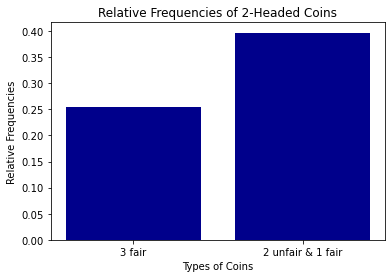

In [6]:
import enchant
import numpy as np
import pandas as pd
from turtle import color
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from MonteCarloSimulator.montecarlo import *


# 1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

fair = Die(['H','T'])
unfair = Die(['H','T'])
unfair.changeWeight('H',5)

# 2. Play a game of 1000 flips of three fair coins with all fair dice.
nroll = 1000
fairGame = Game([fair, fair, fair])
fairGame.play(nroll)


# 3. Play a game of 1000 flips with two unfair dice and one fair dice.
unfairGame = Game([unfair, unfair, fair])
unfairGame.play(nroll)

# 4. For each game, use an Analyzer object to determine the relative frequency of jackpots - getting either all Hs or all Ts.
fairGameAnalyzer = Analyzer(fairGame)
fairGameJackpot = fairGameAnalyzer.jackpot()
unfairGameAnalyzer = Analyzer(unfairGame)
unfairGameJackpot = unfairGameAnalyzer.jackpot()

# 5. Compute relative frequency as the number of jackpots over the total number of rolls.
fairGameFrequencies = fairGameJackpot/nroll
unfairGameFrequencies = unfairGameJackpot/nroll

# 6. Show your results, comparing the two relative frequencies, in a simple bar chart.
data = {'3 fair':fairGameFrequencies, '2 unfair & 1 fair':unfairGameFrequencies}
games = list(data.keys())
values = list(data.values())
plt.bar(games, values, color = "darkblue")
plt.xlabel("Types of Coins")
plt.ylabel("Relative Frequencies")
plt.title("Relative Frequencies of 2-Headed Coins")
plt.show


## Scenario 2

<function matplotlib.pyplot.show(close=None, block=None)>

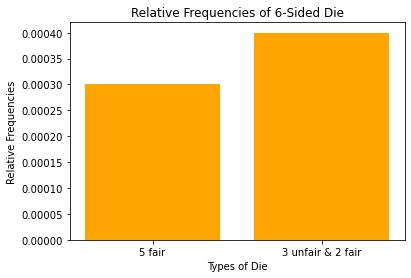

In [7]:
# 1. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

fair = Die([1,2,3,4,5,6])
unfair1 = Die([1,2,3,4,5,6])
unfair2 = Die([1,2,3,4,5,6])
unfair1.changeWeight(6,5)
unfair2.changeWeight(1,5)

# 2. Play a game of 10000 rolls with 5 fair dice

nroll = 10000
fairGame = Game([fair, fair, fair, fair, fair])
fairGame.play(nroll)

# 3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type2, and the rest fair dice.
unfairGame = Game([unfair1, unfair1, unfair2, fair, fair])
unfairGame.play(nroll)

# 4. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
fairGameAnalyzer = Analyzer(fairGame)
fairGameJackpot = fairGameAnalyzer.jackpot()
unfairGameAnalyzer = Analyzer(unfairGame)
unfairGameJackpot = unfairGameAnalyzer.jackpot()

data = {'5 fair':fairGameJackpot/nroll, '3 unfair & 2 fair':unfairGameJackpot/nroll}
games = list(data.keys())
values = list(data.values())
plt.bar(games, values, color="orange")
plt.xlabel("Types of Die")
plt.ylabel("Relative Frequencies")
plt.title("Relative Frequencies of 6-Sided Die")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

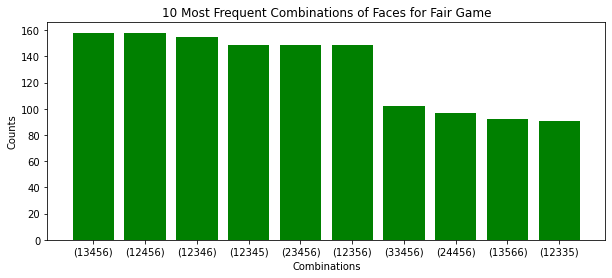

In [8]:
# 5. Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

fairGameAnalyzer.combo()
fairGameCombos = fairGameAnalyzer.comboDF
fairGameCombos = fairGameCombos[:10]
indices = pd.DataFrame(fairGameCombos.index)
stringlist = []
for i in range(10):
    stringlist.append((str(indices[0][i])).replace(', ', ''))
fairGameCombos['stringlist']=stringlist

plt.figure(figsize=(10, 4))
plt.bar(list(fairGameCombos['stringlist'].values), list(fairGameCombos['frequencies'].values), color="green")
plt.xlabel("Combinations")
plt.ylabel("Counts")
plt.title("10 Most Frequent Combinations of Faces for Fair Game")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

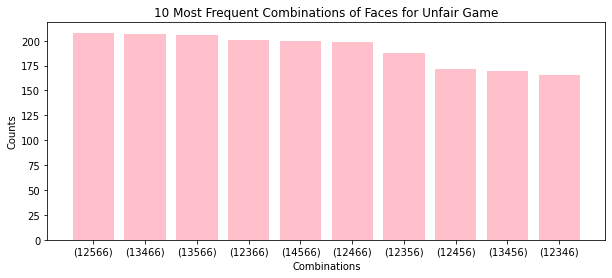

In [9]:
unfairGameAnalyzer.combo()
unfairGameCombos = unfairGameAnalyzer.comboDF
unfairGameCombos = unfairGameCombos[:10]
indices = pd.DataFrame(unfairGameCombos.index)
stringlist = []
for i in range(10):
    stringlist.append((str(indices[0][i])).replace(', ', ''))
unfairGameCombos['stringlist']=stringlist

plt.figure(figsize=(10, 4))
plt.bar(list(unfairGameCombos['stringlist'].values), list(unfairGameCombos['frequencies'].values), color="pink")
plt.xlabel("Combinations")
plt.ylabel("Counts")
plt.title("10 Most Frequent Combinations of Faces for Unfair Game")
plt.show

## Scenario 3

In [10]:
# 1. Create a "die" of letters from a to z with weights based on their frequency of usage.

letters_dict = {'A': 8.4966, 'B': 2.0720, 'C': 4.5388, 'D ': 3.3844, 'E': 11.1607,
'F': 1.8121, 'G': 4.4705, 'H': 3.0034, 'I': 7.5448, 'J': 0.1965,
'K': 1.1016, 'L': 5.4893, 'M': 3.0129, 'N': 6.6544, 'O': 7.1635, 
'P': 3.1671, 'Q': 0.1962, 'R': 7.5809, 'S': 5.7351, 'T': 6.9509,
'U': 3.6308, 'V': 1.0074, 'W': 1.2899, 'X': 0.2902, 'Y': 1.7779, 'Z': 0.2722}
letterDice = Die(list(letters_dict.keys()))
for each in list(letters_dict.keys()):
    letterDice.changeWeight(each,letters_dict.get(each))

# 2. Play a game involving5 of these dice with 1000 rolls.

letterGame = Game([letterDice, letterDice, letterDice, letterDice, letterDice])
letterGame.play(1000)

# 3. How many combos can you get that look like actual English words?
letterDF = letterGame.show()
letterDF['potentialWords'] = letterDF[0] + letterDF[1] + letterDF[2] + letterDF[3] + letterDF[4]

dict = enchant.Dict("en_US")
english_words = []
for i in letterDF['potentialWords']:
    if dict.check(i)==True:
        english_words.append(i)


# 4. Based on your eye count, what is the relative frequency of these words versus the rest?

len(english_words) / len(letterDF)



0.001

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [28]:
!ls -lRF -o

total 384
-rw-r--r--  1 gargeejagtap  77811 Jul 14 20:56 FinalProjectSubmissionTemplate.ipynb
-rw-r--r--  1 gargeejagtap   1070 Jul 14 09:55 LICENSE
drwxr-xr-x  4 gargeejagtap    128 Jul 14 20:24 MonteCarloSimulator/
drwxr-xr-x  6 gargeejagtap    192 Jul 14 21:06 MonteCarloSimulator.egg-info/
-rw-r--r--  1 gargeejagtap   8187 Jul 14 20:25 README.md
drwxr-xr-x  3 gargeejagtap     96 Jul 14 19:49 __pycache__/
-rw-r--r--  1 gargeejagtap     63 Jul 14 21:06 directory.py
-rw-r--r--  1 gargeejagtap    541 Jul 14 11:15 montecarlo.txt
-rw-r--r--  1 gargeejagtap  85733 Jul 14 20:05 montecarlo_demo.ipynb
-rw-r--r--  1 gargeejagtap   4960 Jul 14 20:25 montecarlo_tests.py
-rw-r--r--  1 gargeejagtap    450 Jul 14 20:59 setup.py

./MonteCarloSimulator:
total 24
-rw-r--r--  1 gargeejagtap    47 Jul 14 20:25 __init__.py
-rw-r--r--  1 gargeejagtap  6346 Jul 14 20:58 montecarlo.py

./MonteCarloSimulator.egg-info:
total 32
-rw-r--r--  1 gargeejagtap  399 Jul 14 21:06 PKG-INFO
-rw-r--r--  1 gargeejagtap  

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [31]:
# Installation commands
!pip install -e .

Obtaining file:///Users/gargeejagtap/Desktop/UVA/DS5100/FinalProjectDS5100
  Attempting uninstall: MonteCarloSimulator
    Found existing installation: MonteCarloSimulator 0.1
    Uninstalling MonteCarloSimulator-0.1:
      Successfully uninstalled MonteCarloSimulator-0.1
  Running setup.py develop for MonteCarloSimulator
